<a href="https://colab.research.google.com/github/Deepaksingh11111/imageai/blob/main/aimodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# image analyzer
analyze image and extract all the question from it and give correct answer of all the questions .
only image file will be allowed to upload here


*   .jpeg
*   .png



Saving Screenshot 2025-09-22 234054.png to Screenshot 2025-09-22 234054.png
Uploaded file "Screenshot 2025-09-22 234054.png"


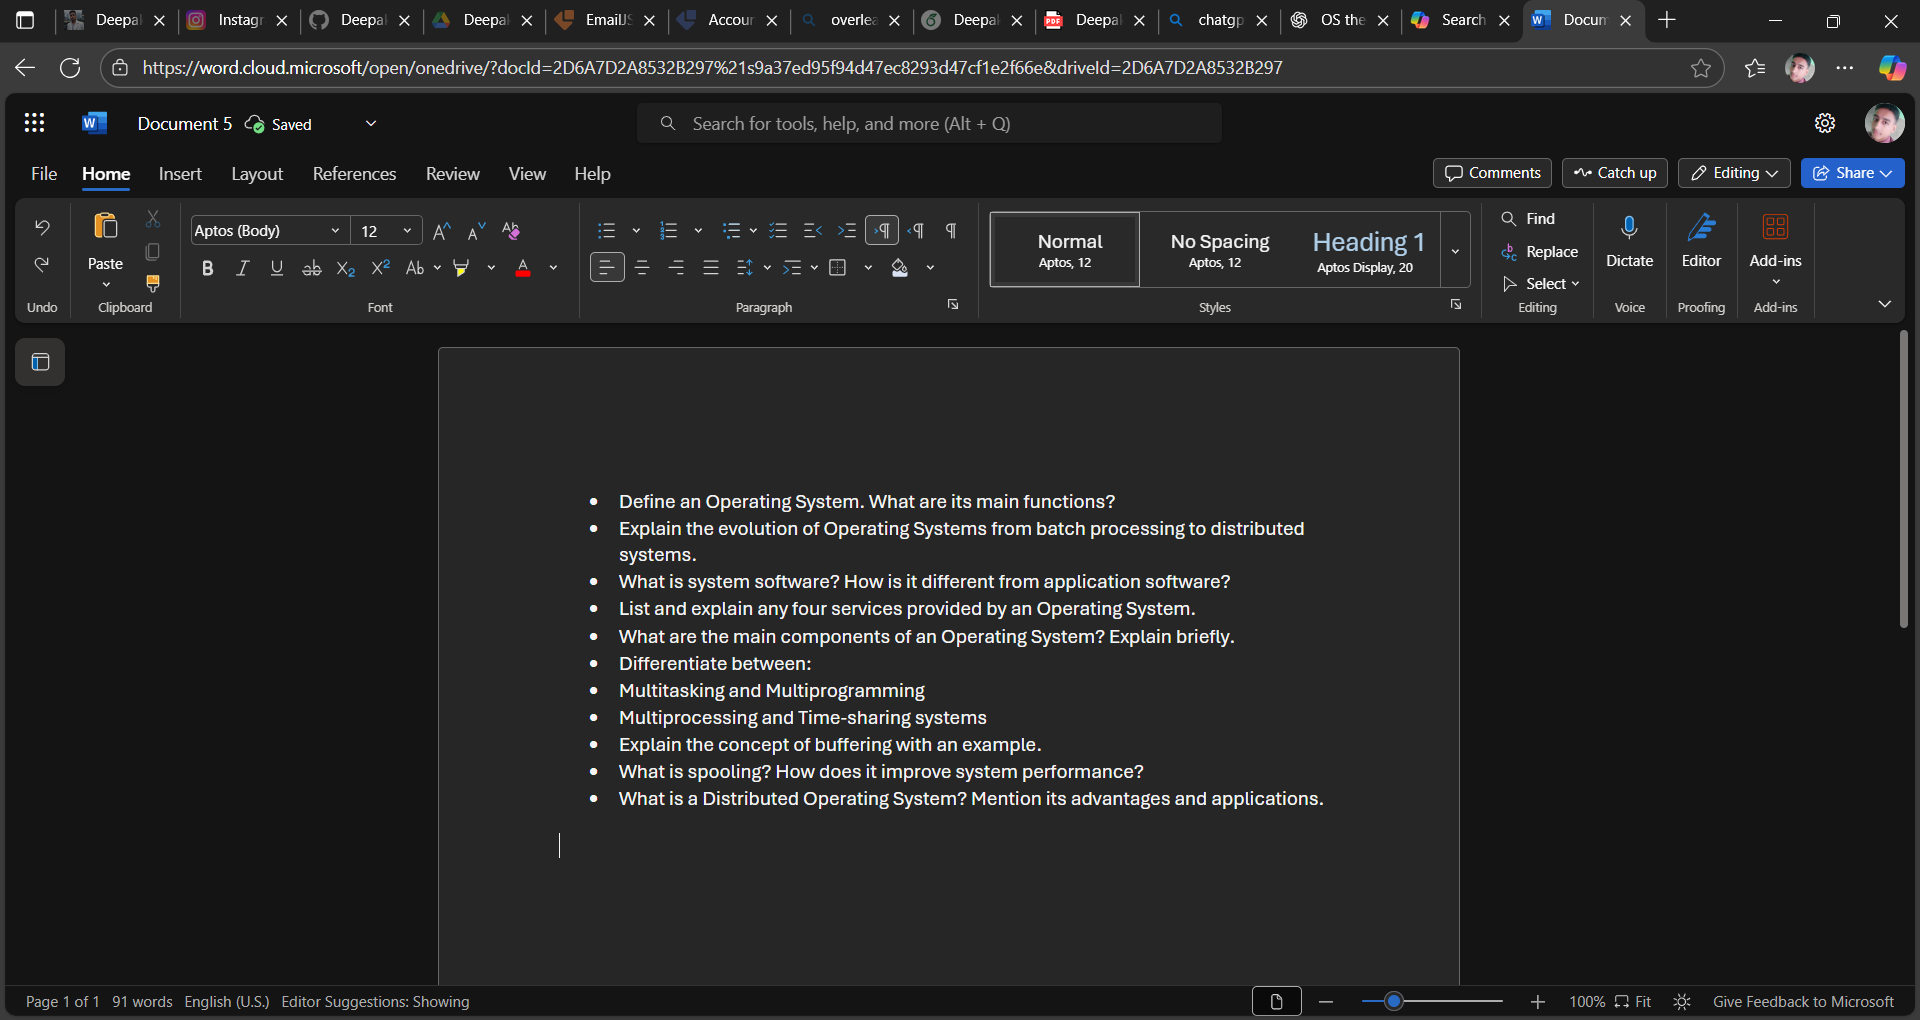

In [3]:
from google.colab import files
from IPython.display import Image, display

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'Uploaded file "{filename}"')
  # Display the uploaded image
  display(Image(filename))

  # Store the filename for later use
  image_filename = filename

In [4]:
import google.generativeai as genai
from google.colab import userdata
from PIL import Image  # Import Image from Pillow

# Load the Google API key from Colab secrets
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

# Initialize the Gemini Pro Vision model
# Changed model name to 'gemini-1.5-flash-latest' which supports vision tasks
model = genai.GenerativeModel('gemini-1.5-flash-latest')

# Assuming the image filename is stored in the 'image_filename' variable
if 'image_filename' in locals():
  image_path = image_filename
  image = Image.open(image_path) # Use PIL.Image.open()

  # Create a prompt to ask the model to extract questions and answers
  prompt = "Extract all the questions and their corresponding answers from this image."

  # Generate content from the model with the image and prompt
  response = model.generate_content([prompt, image])

  # Print the model's response
  print("Model Response:")
  print(response.text)

  # Store the response for later processing
  questions_and_answers_response = response.text

else:
  print("Image not uploaded. Please run the previous cell to upload an image.")

Model Response:
Here's a list of the questions and (implied) answers from the image:

1. **Question:** Define an Operating System. What are its main functions?
   **Answer:**  (Not provided in the image.  The image only lists the question.)


2. **Question:** Explain the evolution of Operating Systems from batch processing to distributed systems.
   **Answer:** (Not provided in the image. The image only lists the question.)


3. **Question:** What is system software? How is it different from application software?
   **Answer:** (Not provided in the image. The image only lists the question.)


4. **Question:** List and explain any four services provided by an Operating System.
   **Answer:** (Not provided in the image. The image only lists the question.)


5. **Question:** What are the main components of an Operating System? Explain briefly.
   **Answer:** (Not provided in the image. The image only lists the question.)


6. **Question:** Differentiate between:
    * Multitasking and Mul

In [5]:
# Assuming 'questions_and_answers_response' contains the text extracted from the image
# and that it contains the questions.

# This is a basic attempt to extract questions. A more robust approach might be needed
# depending on the format of the 'questions_and_answers_response'.
import re

questions = []
if 'questions_and_answers_response' in locals() and questions_and_answers_response:
    # Split the response into lines
    lines = questions_and_answers_response.splitlines()

    # Iterate through lines and identify potential questions.
    # Assuming lines starting with a number or letter followed by a period and space are questions.
    for line in lines:
        stripped_line = line.strip()
        if re.match(r'^\s*(\d+|\w+)\.\s+', stripped_line):
            questions.append(stripped_line)

if questions:
    print("Extracted Questions:")
    for i, question in enumerate(questions):
        print(f"Question {i+1}: {question}")

    # Now, use the model to generate answers for these questions
    print("\nGenerating Answers...")
    answers = []
    for i, question in enumerate(questions):
        try:
            # Use the model to generate content for each question
            # Using a different model potentially better suited for Q&A
            qa_model = genai.GenerativeModel('gemini-1.5-flash-latest') # Using a different model for Q&A
            answer_response = qa_model.generate_content(f"Answer the following question: {question}")
            answers.append(answer_response.text)
            print(f"Generated answer for Question {i+1}")
        except Exception as e:
            answers.append(f"Could not generate answer for Question {i+1}: {e}")
            print(f"Error generating answer for Question {i+1}: {e}")

    print("\nGenerated Answers:")
    for i, answer in enumerate(answers):
        print(f"Answer {i+1}: {answer}")

else:
    print("No questions were extracted from the image response.")

Extracted Questions:
Question 1: 1. **Question:** Define an Operating System. What are its main functions?
Question 2: 2. **Question:** Explain the evolution of Operating Systems from batch processing to distributed systems.
Question 3: 3. **Question:** What is system software? How is it different from application software?
Question 4: 4. **Question:** List and explain any four services provided by an Operating System.
Question 5: 5. **Question:** What are the main components of an Operating System? Explain briefly.
Question 6: 6. **Question:** Differentiate between:
Question 7: 7. **Question:** Explain the concept of buffering with an example.
Question 8: 8. **Question:** What is spooling? How does it improve system performance?
Question 9: 9. **Question:** What is a Distributed Operating System? Mention its advantages and applications.

Generating Answers...
Generated answer for Question 1
Generated answer for Question 2
Generated answer for Question 3
Generated answer for Question 4

# Image analyzer and File analyzer
**The project will be completed, and the image/file analyzer source code will be available soon on GitHub. **
# Project Review
** This project is a generative AI that provides answers to your exam question papers and other questions from photos and files.**

# Project Creator
Chaudhary Deepak Singh Mahalwar

